### Solution By: Suraj K. Ekka
Last updated Aug 28, 2020
___
### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
#Packages for data processing
import pandas as pd
import numpy as np

#Packages for Ploting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

#To warnings turn off
import warnings
warnings.filterwarnings('ignore')


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
Movie_Data = pd.read_csv('Movie_Data.csv')
User_Rating = pd.read_csv('User_Rating.csv')
User_Data = pd.read_csv('User_Data.csv')

Movie_Data_Orignal = Movie_Data.copy() #Copy of orignal data as backup

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

#### 3.a Info of Data Frames

In [3]:
Movie_Data.info

<bound method DataFrame.info of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childre

In [4]:
User_Rating.info

<bound method DataFrame.info of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

In [5]:
User_Data.info

<bound method DataFrame.info of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

#### 3.b Shape of Data Frame

In [6]:
print("Shape of Movie_Data") 
print(Movie_Data.shape)
print ('')

print("Shape of User_Rating") 
print(User_Rating.shape)
print ('')

print("Shape of User_Data") 
print(User_Data.shape)

Shape of Movie_Data
(1681, 22)

Shape of User_Rating
(100000, 4)

Shape of User_Data
(943, 5)


#### 3.c Describing Data Sets

In [7]:
Movie_Data.describe

<bound method NDFrame.describe of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Child

In [8]:
User_Rating.describe

<bound method NDFrame.describe of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

In [9]:
User_Data.describe

<bound method NDFrame.describe of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

#### 3.d Number of missing values in the data

In [10]:
Movie_Data.isna().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [11]:
User_Rating.isna().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [12]:
User_Data.isna().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [13]:
# use sum on the default axis
Genre = Movie_Data.sum(axis=0)
Genre = Genre.iloc[3:]
df_Genre = Genre.to_frame(name ='Movie_Count')
df_Genre

,Movie_Count
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


#### 5. Find the movies that have more than one genre - 5 marks

In [28]:
Movie_Data_a=Movie_Data.drop(columns=['movie id','release date'])
#Sum on axis =1

In [33]:
#Sum on axis =1
Movie_Data_a["sum"]=Movie_Data_a.sum(axis=1)
Movie_Data_a_more_than_1_genre = Movie_Data_a[Movie_Data_a["sum"]>1]
print(Movie_Data_a_more_than_1_genre)
# item_more_than_1_genre.shape

                              movie title  unknown  Action  Adventure  \
0                              Toy Story         0       0          0   
1                              GoldenEye         0       1          1   
2                             Four Rooms         0       0          0   
3                             Get Shorty         0       1          0   
4                                Copycat         0       0          0   
...                                   ...      ...     ...        ...   
1676                          Mat' i syn         0       0          0   
1677                           B. Monkey         0       0          0   
1678                       Sliding Doors         0       0          0   
1679                        You So Crazy         0       0          0   
1680  Scream of Stone (Schrei aus Stein)         0       0          0   

      Animation  Childrens  Comedy  Crime  Documentary  Drama  ...  Film-Noir  \
0             1          1       1      0 

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [34]:
Movie_Data_no_unknown = Movie_Data.query("unknown != 1")

In [35]:
#Results verification
Genre_F = Movie_Data_no_unknown.sum(axis=0)
Genre_F = Genre_F.iloc[3:]
df_Genre_F = Genre_F.to_frame(name ='Movie_Count')
df_Genre_F

,Movie_Count
unknown,0
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: Use distplot for age and countplot for gender,ratings,occupation. Use lineplot or countplot for release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)

In [36]:
#Merging User Ratings and User Info in dataframe df_User
df_User = pd.merge(User_Rating, User_Data, on='user id', how='outer')

#Mering df_User and Movies Orignal data in combined all data

df_Cobined = pd.merge(Movie_Data_no_unknown, df_User, on = 'movie id', how = 'outer')

In [37]:
User_Rating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [38]:
df_User.head()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105


In [39]:
print (User_Rating.shape)
print (' ')
print(df_User.shape)
print (' ')
print (Movie_Data_Orignal.shape)
print(' ')
print (df_Cobined.shape)

(100000, 4)
 
(100000, 8)
 
(1681, 22)
 
(100000, 29)


In [40]:
df_Cobined.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Thriller,War,Western,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,244,4,880604405,28,M,technician,80525
1,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,298,5,884126061,44,M,executive,01581
2,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,253,5,891628467,26,F,librarian,22903
3,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,305,5,886323153,23,M,programmer,94086
4,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,6,4,883599478,42,M,executive,98101


In [41]:
#Creating a column with year in combined data
df_Cobined['Year'] = pd.DatetimeIndex(df_Cobined['release date']).year

In [42]:
df_Cobined.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,War,Western,user id,rating,timestamp,age,gender,occupation,zip code,Year
0,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,244,4,880604405,28,M,technician,80525,1995.0
1,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,298,5,884126061,44,M,executive,01581,1995.0
2,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,253,5,891628467,26,F,librarian,22903,1995.0
3,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,305,5,886323153,23,M,programmer,94086,1995.0
4,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,6,4,883599478,42,M,executive,98101,1995.0


### Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

1. Distplot for age 
2. countplot for 
    gender
    rating
    occupation
3. lineplot or countplot for release year.

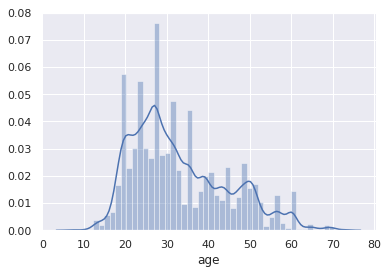

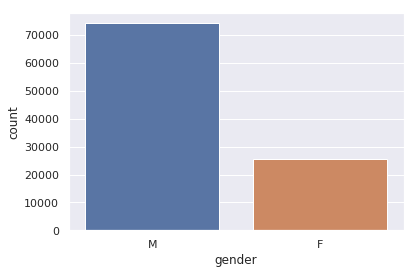

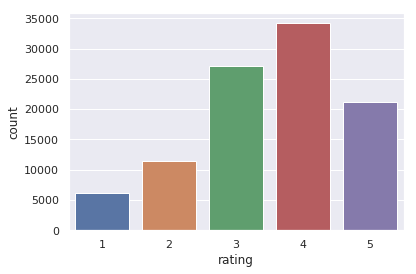

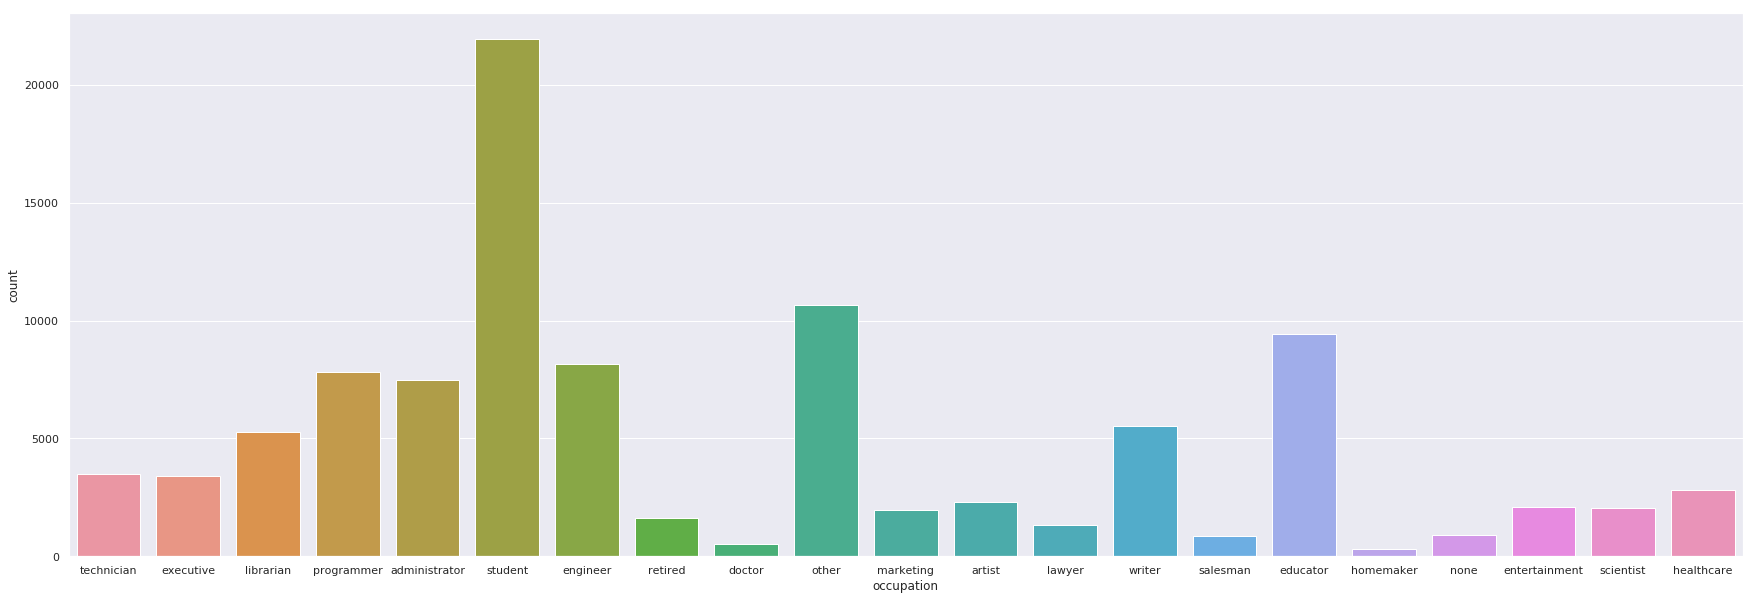

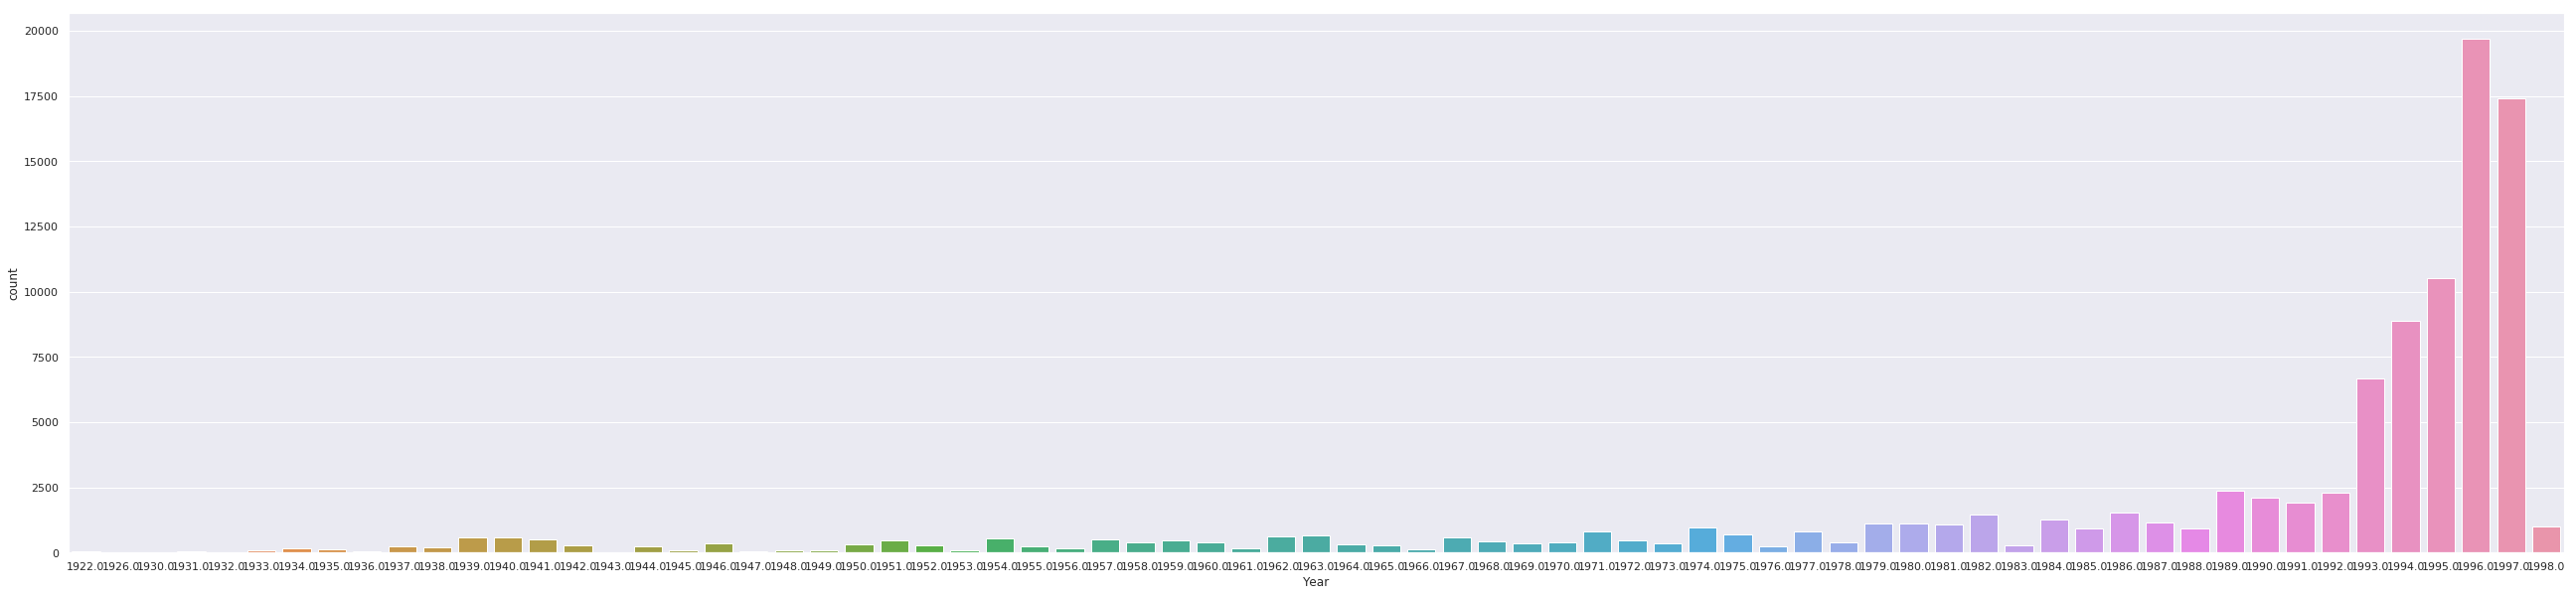

In [43]:
# sns.set(style="darkgrid")
sns.distplot(df_Cobined['age'])
plt.show()

sns.countplot(df_Cobined['gender'])
plt.show()

# sns.countplot(df_Cobined['rating'], hue = df_Cobined['gender'])
sns.countplot(User_Rating['rating'])
plt.show()

#distribution by Occupation
plt.figure(figsize=(30,10)) 
sns.countplot(df_Cobined['occupation'])
plt.show()

#distribution by Year
plt.figure(figsize=(45,10)) 
sns.countplot(df_Cobined['Year'])
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

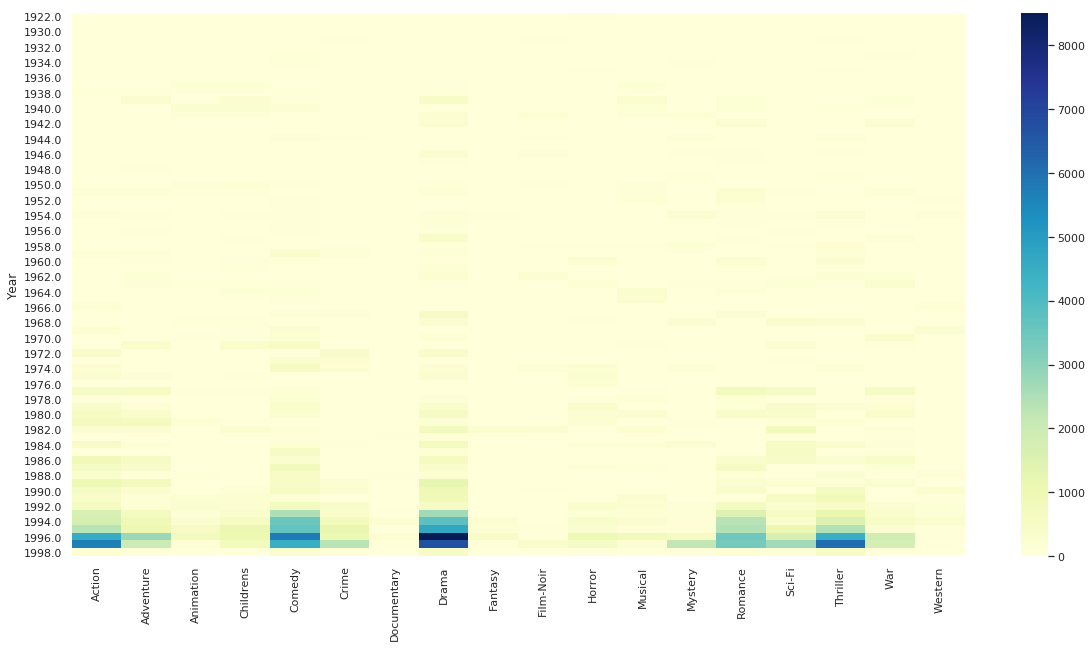

In [44]:
genre_over_year = df_Cobined.groupby('Year')['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'].sum()
genre_over_year.head()
plt.figure(figsize=(20,10))
# sns.heatmap
sns.heatmap(genre_over_year, cmap="YlGnBu")
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. 
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.
4. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [45]:
df_9_count = df_Cobined.groupby('movie title')['rating'].count().to_frame(name = 'Rated_Population').reset_index()
df_9_avg = df_Cobined.groupby('movie title')['rating'].mean().to_frame(name = 'Ratings_avg').reset_index()

df_9 = pd.merge(df_9_count, df_9_avg, on = 'movie title', how = 'outer') 
# df_Cobined.groupby("movie id").size().to_frame(name = 'count').reset_index()

In [46]:
df_9_filtered = df_9[df_9['Rated_Population'] > 100]
df_9_filtered = df_9_filtered.sort_values(by=['Ratings_avg'], ascending=False).reset_index()
df_9_filtered.shape

(334, 4)

### Top 25 movies rated by atleast 100

In [47]:
df_9_filtered.head(25)

,index,movie title,Rated_Population,Ratings_avg
0,317,"Close Shave, A",112,4.491071
1,1277,Schindler's List,298,4.466443
2,1646,"Wrong Trousers, The",118,4.466102
3,272,Casablanca,243,4.456790
4,1312,"Shawshank Redemption, The",283,4.445230
5,1213,Rear Window,209,4.387560
6,1566,"Usual Suspects, The",267,4.385768
7,1393,Star Wars,583,4.358491
8,3,12 Angry Men,125,4.344000
9,302,Citizen Kane,198,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [48]:
df_Cobined.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,War,Western,user id,rating,timestamp,age,gender,occupation,zip code,Year
0,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,244,4,880604405,28,M,technician,80525,1995.0
1,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,298,5,884126061,44,M,executive,01581,1995.0
2,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,253,5,891628467,26,F,librarian,22903,1995.0
3,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,305,5,886323153,23,M,programmer,94086,1995.0
4,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,6,4,883599478,42,M,executive,98101,1995.0


In [50]:
#drama
df_drama = df_Cobined[df_Cobined['Drama'] == 1]
df_drama = df_drama.groupby('gender')['rating'].count().to_frame(name = 'Rating').reset_index()
df_drama['perct'] = (df_drama['Rating'] / df_drama['Rating'].sum())*100
df_drama =df_drama.assign(Genre='drama')
df_drama = df_drama.set_index('gender')
df_drama.head()

,Rating,perct,Genre
gender,,,
F,11008,27.59243,drama
M,28887,72.40757,drama


In [51]:
#Sci-Fi
df_Sci_Fi = df_Cobined[df_Cobined['Sci-Fi'] == 1]
df_Sci_Fi = df_Sci_Fi.groupby('gender')['rating'].count().to_frame(name = 'Rating').reset_index()
df_Sci_Fi['perct'] = (df_Sci_Fi['Rating'] / df_Sci_Fi['Rating'].sum())*100
df_Sci_Fi =df_Sci_Fi.assign(Genre='Sci-Fi')
df_Sci_Fi = df_Sci_Fi.set_index('gender')
df_Sci_Fi.head()

,Rating,perct,Genre
gender,,,
F,2629,20.652003,Sci-Fi
M,10101,79.347997,Sci-Fi


In [52]:
#Romance
df_Romance = df_Cobined[df_Cobined['Romance'] == 1]
df_Romance = df_Romance.groupby('gender')['rating'].count().to_frame(name = 'Rating').reset_index()
df_Romance['perct'] = (df_Romance['Rating'] / df_Sci_Fi['Rating'].sum())*100
df_Romance =df_Romance.assign(Genre='Romance')
df_Romance = df_Romance.set_index('gender')

df_Romance.head()

,Rating,perct,Genre
gender,,,
F,5858,46.017282,Romance
M,13603,106.857816,Romance


#### Graphical Representation

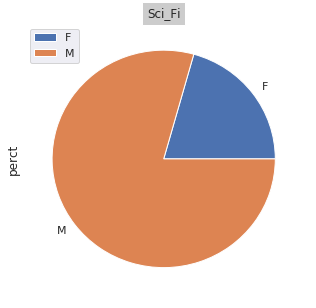

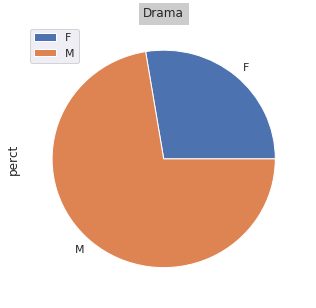

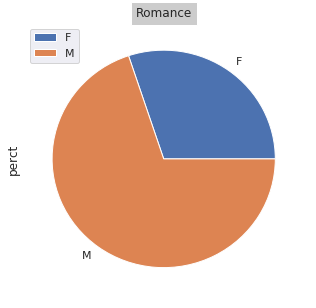

In [53]:
plot = df_Sci_Fi.plot.pie(y='perct', figsize=(5, 5))
plt.title("Sci_Fi", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

plot = df_drama.plot.pie(y='perct', figsize=(5, 5))
plt.title("Drama", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

plot = df_Romance.plot.pie(y='perct', figsize=(5, 5))
plt.title("Romance", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

### Conclusion 
* Men watch more drama than women: True
* Women watch more Sci-Fi than men: False
* Men watch more Romance than women: True